<a href="https://colab.research.google.com/github/lustraka/Data_Analysis_Workouts/blob/main/Communicate_Data_Findings/SandBox/Bivariate_Exploration_Fuel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bivariate Exploration Pattern Language
## Dataset: Fuel_Econ

In [3]:
# Import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Read the csv file, and check its shape and head
path = 'https://github.com/lustraka/Data_Analysis_Workouts/raw/main/Communicate_Data_Findings/SandBox/'
fuel_econ = pd.read_csv(path + 'fuel-econ.csv')
print(fuel_econ.shape)
fuel_econ.head()

(3929, 20)


,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


## Scatter Plot

A **scatterplot** is used to show the relationship between two quantitative variables. The two variables are indicated on X and Y-axis, respectively. Through the scatterplots, we can see clearly how these two variables correlate with each other.

To quantify how strong the correlation is between the variables, we use a correlation coefficient. **Pearson correlation coefficient (r)** captures linear relationships. It is a value ranging from -1 to +1.

###  The relationship between fuel mileage ratings for city vs. highway driving

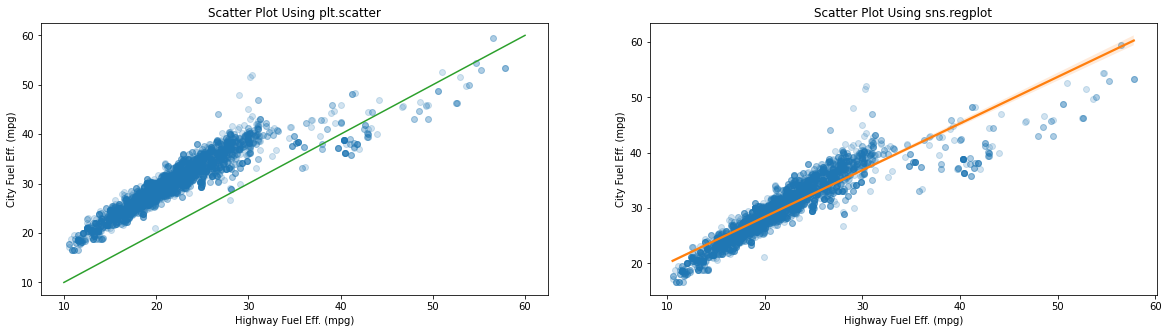

In [66]:
# Initialize a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=[20,5])

# CHART ON LEFT - plt.scatter with a diagonal
axs[0].scatter(data=fuel_econ, x='city', y='highway', alpha=0.2)
axs[0].set(xlabel='Highway Fuel Eff. (mpg)', ylabel='City Fuel Eff. (mpg)', 
           title='Scatter Plot Using plt.scatter')
# Plot diagonal line from (10,10) to (60,60)
axs[0].plot([10,60], [10,60], color=sns.color_palette()[2])

# CHART ON RIGHT - sns.regplot with a regression line
sns.regplot(data=fuel_econ, x='city', y='highway', scatter_kws={'alpha':0.2},
            line_kws={'color':sns.color_palette()[1]}, ax=axs[1])
axs[1].set(xlabel='Highway Fuel Eff. (mpg)', ylabel='City Fuel Eff. (mpg)', 
           title='Scatter Plot Using sns.regplot')

plt.show()

Most of the data fall in a large blob between 10 and 30 mpg city and 20 to 40 mpg highway. Interestingly, for most cars highway mileage is clearly higher than city mileage, but for those cars with city mileage above about 30 mpg, the distinction is less pronounced. In fact, most cars above 45 mpg city have better city mileage than highway mileage, contrary to the main trend.

## Heat Maps
A **heat map** is a 2-d version of the histogram that can be used as an alternative to a scatterplot.

### How does the engine size relate to a car's CO2 footprint?

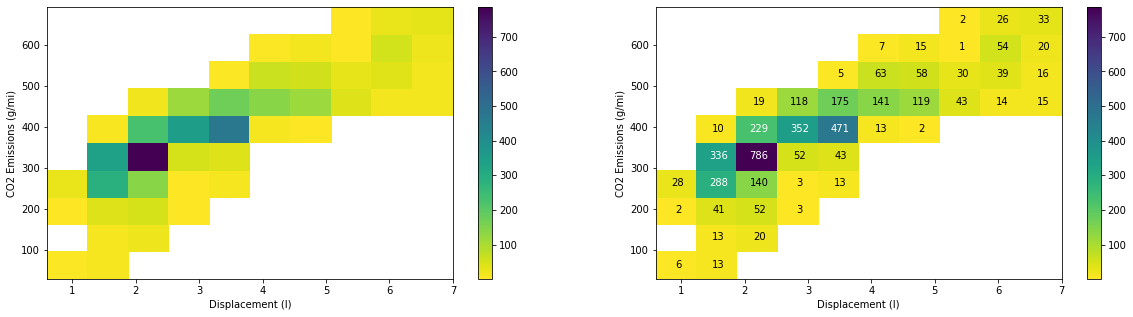

In [63]:
# Initialize a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=[20,5])

# CHART ON LEFT - plt.hist2d
hmp = axs[0].hist2d(data=fuel_econ, x='displ', y='co2',
              cmin=0.5, cmap='viridis_r')
axs[0].set(xlabel='Displacement (l)', ylabel='CO2 Emissions (g/mi)')
plt.colorbar(hmp[3], ax=axs[0])

# CHART ON RIGHT - plt.hist2d annotated
hmp = axs[1].hist2d(data=fuel_econ, x='displ', y='co2',
              cmin=0.5, cmap='viridis_r')
axs[1].set(xlabel='Displacement (l)', ylabel='CO2 Emissions (g/mi)')
plt.colorbar(hmp[3], ax=axs[1])

# Select the bi-dimensional histogram with conts
counts = hmp[0]

# Add text annotation on each cell
for i in range(counts.shape[0]):
  for j in range(counts.shape[1]):
    c = counts[i,j]
    # Increase visibility on darker cells
    if c > 200:
      plt.text(hmp[1][i]+0.35, hmp[2][j]+35, int(c), ha='center', va='center', color='white')
    elif c > 0:
      plt.text(hmp[1][i]+0.35, hmp[2][j]+35, int(c), ha='center', va='center')

plt.show()

The visualization shows that most cars fall in a line where larger engine sizes correlate with higher emissions. The trend is somewhat broken by those cars with the lowest emissions, which still have engine sizes shared by most cars (between 1 and 3 liters).